In [1]:
get_ipython().run_cell_magic('capture', '', "%logstop\n%logstart -t -r -q ipython_command_log.py global\n#- IRONHACKS RESEARCH TRACKING CODE\n#----------------------------------\n# The following code is used to help our research team understand how you \n# our notebook environment. We do not collect any personal information with\n# the following code, it is used to measure when and how often you work on\n# your submission files.\nimport os\nfrom datetime import datetime\nimport IPython.core.history as history\nha = history.HistoryAccessor()\nha_tail = ha.get_tail(1)\nha_cmd = next(ha_tail)\nsession_id = str(ha_cmd[0])\ncommand_id = str(ha_cmd[1])\ntimestamp = datetime.utcnow().isoformat()\nhistory_line = ','.join([session_id, command_id, timestamp]) + '\\n'\nlogfile = open(os.environ['HOME']+'/ipython_session_log.csv', 'a')\nlogfile.write(history_line)\nlogfile.close()\n")

In [2]:
get_ipython().run_cell_magic('capture', '--no-display', '!pip3 install db-dtypes\n')

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.cloud import bigquery
from google.oauth2 import service_account
from google.cloud.bigquery import magics

In [5]:
# Google Credential
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] ='key.json'
bigquery_client = bigquery.Client(project='ironhacks-data')

DefaultCredentialsError: File key.json was not found.

In [6]:
# Query the three provided data tables 
unemployement_data_query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.unemployment_data`
"""

In [7]:
wage_data_query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.wage_data`
"""

In [8]:
prediction_list_query = """
SELECT *
FROM `ironhacks-data.ironhacks_competition.prediction_list`
"""

In [9]:
# QUERY THE DATA ONCE
ud_query_job = bigquery_client.query(unemployement_data_query)
wd_query_job = bigquery_client.query(wage_data_query)
pl_query_job = bigquery_client.query(prediction_list_query)

NameError: name 'bigquery_client' is not defined

In [10]:
unemployement_data = ud_query_job.to_dataframe()
wage_data = wd_query_job.to_dataframe()
prediction_list = pl_query_job.to_dataframe()

NameError: name 'ud_query_job' is not defined

In [11]:
# save the query results to csv files
unemployement_data.to_csv("data/unemployment_data.csv")
print("unemployment_data shape:", unemployement_data.shape)

NameError: name 'unemployement_data' is not defined

In [12]:
wage_data.to_csv("data/wage_data.csv")
print("wage_data shape:", wage_data.shape)

NameError: name 'wage_data' is not defined

In [13]:
prediction_list.to_csv("data/prediction_list.csv")
print("prediction_list shape:", prediction_list.shape)

NameError: name 'prediction_list' is not defined

In [14]:
# check if how many weeks of data are provided for each uu_id
query = """
SELECT uu_id, COUNT(week_number) as num_of_weeks
FROM ironhacks-data.ironhacks_competition.unemployment_data
GROUP BY uu_id
ORDER BY num_of_weeks DESC
"""

In [15]:
bigquery_client.query(query).to_dataframe()

NameError: name 'bigquery_client' is not defined

In [16]:
# query week_number data for uu_id 920b9820c654673d472494c346da5651
query = """
SELECT uu_id, week_number
FROM ironhacks-data.ironhacks_competition.unemployment_data
WHERE uu_id="920b9820c654673d472494c346da5651"
ORDER BY week_number
"""
print(bigquery_client.query(query).to_dataframe().to_string(index=False))

NameError: name 'bigquery_client' is not defined

In [17]:
# use distinct to remove the duplication and re-count the number of weeks
query = """
SELECT uu_id, COUNT(DISTINCT(week_number)) as num_of_weeks
FROM ironhacks-data.ironhacks_competition.unemployment_data
GROUP BY uu_id
ORDER BY num_of_weeks DESC
"""

In [18]:
bigquery_client.query(query).to_dataframe()

NameError: name 'bigquery_client' is not defined

In [19]:
# use sub-query to retrieve the num_of_uuids vs num_of_weeks, plot the results
query = """
SELECT num_of_weeks, COUNT(num_of_weeks) as num_of_uuids
FROM (
    SELECT uu_id, COUNT(DISTINCT(week_number)) as num_of_weeks
    FROM ironhacks-data.ironhacks_competition.unemployment_data
    GROUP BY uu_id
    ORDER BY num_of_weeks DESC
)
GROUP BY num_of_weeks
ORDER BY num_of_weeks
"""

In [20]:
uuid_weeks = bigquery_client.query(query).to_dataframe()

NameError: name 'bigquery_client' is not defined

In [21]:
week_count_label = list(map(str, list(uuid_weeks["num_of_weeks"])))
num_of_uuids = list(uuid_weeks["num_of_uuids"])
plt.figure(figsize=(6,6))
plt.barh(week_count_label, num_of_uuids)
plt.yticks(week_count_label)
plt.ylabel("How many weeks of data are included")
plt.xlabel("Number of UUIDs")
for i, v in enumerate(num_of_uuids):
    plt.text(v + 1, i - 0.4, str(v), size="small")
plt.tight_layout()
plt.show()

NameError: name 'uuid_weeks' is not defined

In [22]:
print(str(np.array(num_of_uuids)[-6:].sum()), "out of 573 uuids have no less than 30 weeks of datapoints.")
print(str(np.array(num_of_uuids)[:9].sum()), "out of 573 uuids have no more than 10 weeks of datapoints.")

NameError: name 'num_of_uuids' is not defined

In [23]:
# query the number of datapoints for each week, use DISTINCT on uu_id to remove duplication
QUERY = """
SELECT week_number, Count(DISTINCT(uu_id)) as count
FROM ironhacks-data.ironhacks_competition.unemployment_data
GROUP BY week_number
ORDER BY week_number
"""
query_job = bigquery_client.query(QUERY)
week_number_count = query_job.to_dataframe()
display(week_number_count.T)
print("week_number: \n" + str(week_number_count.T.to_numpy()[0]))
print("count: \n" + str(week_number_count.T.to_numpy()[1]))

NameError: name 'bigquery_client' is not defined

In [24]:
# fill the missing weeks' count with 0 for week 4 and week 23
i = 0
week_number_count_filled = []
for w_c in week_number_count.to_numpy():
    i = i + 1
    if w_c[0] == i:
        week_number_count_filled.append(list(w_c))
    else:
        week_number_count_filled.append(list([i, 0]))
        week_number_count_filled.append(list(w_c))
        i = i + 1
print("Total number of weeks:", i)

NameError: name 'week_number_count' is not defined

In [25]:
# plot the filled result
week_number = list(np.array(week_number_count_filled)[:,0])
week_count = list(np.array(week_number_count_filled)[:,1])
plt.figure(figsize=(8,6))
plt.barh(week_number, week_count)
plt.yticks(week_number)
plt.ylabel("Week number") 
plt.xlabel("Number of Datapoints")
for i, v in enumerate(week_count):
    plt.text(v + 2, i + 0.7, str(v), size="small")
plt.tight_layout()
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [26]:
# select 10 of 96 uuids with 3 weeks' data
QUERY = """
SELECT uu_id
FROM (
    SELECT uu_id, COUNT(DISTINCT(week_number)) as week_count
    FROM ironhacks-data.ironhacks_competition.unemployment_data
    GROUP BY uu_id
)
WHERE week_count = 35
LIMIT 10
"""
query_job = bigquery_client.query(QUERY)
ten_uuid_with_35_weeks = query_job.to_dataframe()
ten_uuid_with_35_weeks

NameError: name 'bigquery_client' is not defined

In [27]:
# query the 10 selected UUID data
ten_35w_data = []
for uu_id in ten_uuid_with_35_weeks["uu_id"]:
    QUERY="""
    SELECT uu_id, week_number, total_claims
    FROM ironhacks-data.ironhacks_competition.unemployment_data
    WHERE uu_id="%s"
    ORDER BY week_number
    """%(uu_id)
    query_job = bigquery_client.query(QUERY)
    ten_35w_data.append(query_job.to_dataframe().drop_duplicates(ignore_index=True))

NameError: name 'ten_uuid_with_35_weeks' is not defined

In [28]:
# manually add week 4 and week 23 missing data
def fill_week4_and_week23(df, method, replace=False):
    """
    Fill or replace the week 4 and week 23 missing total_claims data.
    Args:
        df: Dataframe
            The input dataframe with missing total claims or to be replaced.
        method: string
            prev - use previous week's value
            next - use next week's value
            mid - use mean value of previous and next weeks
        replace: bool
            True - replace the existing week 4 and week 23 total_claim values
            False - add the missing values
    Returns:
        Dataframe:
            Dataframe with added total_claim values or replaced values.
    """
    uuid = df["uu_id"][0]
    week_list = list(df["week_number"])
    if 4 in week_list and 23 in week_list and not replace:
        print("Week 4 and week 23 data already exist, please use replace=True")
        return df
    if 4 not in week_list and 23 not in week_list and replace:
        print("Week 4 and week 23 data do not exist, replace failed")
        return df
    if 4 not in week_list and 23 not in week_list and not replace:
        print("Fill uuid", uuid, "week 4 and week 23 data with", method, "values")
    if 4 in week_list and 23 in week_list and replace:
        print("Replace uuid", uuid, "week 4 and week 23 data with", method, "values")
        # remove exisiting value and insert again
        df = df.drop(df.index[[3, 22]])
        df = df.sort_index().reset_index(drop=True)
        
    if method == "prev":
        # use previous avaliable week's value
        val_4 = df["total_claims"][2]
        val_23 = df["total_claims"][20]
    if method == "next":
        # use next avaliable week's value
        val_4 = df["total_claims"][3]
        val_23 = df["total_claims"][21]
    if method == "mid":
        # use mean value of previous and next avaliable weeks
        val_4 = int((df["total_claims"][2] + df["total_claims"][3]) * 0.5)
        val_23 = int((df["total_claims"][20] + df["total_claims"][21]) * 0.5)
    
    # week 4
    df.loc[2.5] = [uuid, 4, val_4]
    # week 23
    df.loc[20.5] = [uuid, 23, val_23]
    return df.sort_index().reset_index(drop=True)

In [29]:
# fill the missing data using mean value of prev week and next week for all 10 uuids
for i in range(len(ten_35w_data)):
    ten_35w_data[i] = fill_week4_and_week23(ten_35w_data[i], "mid")

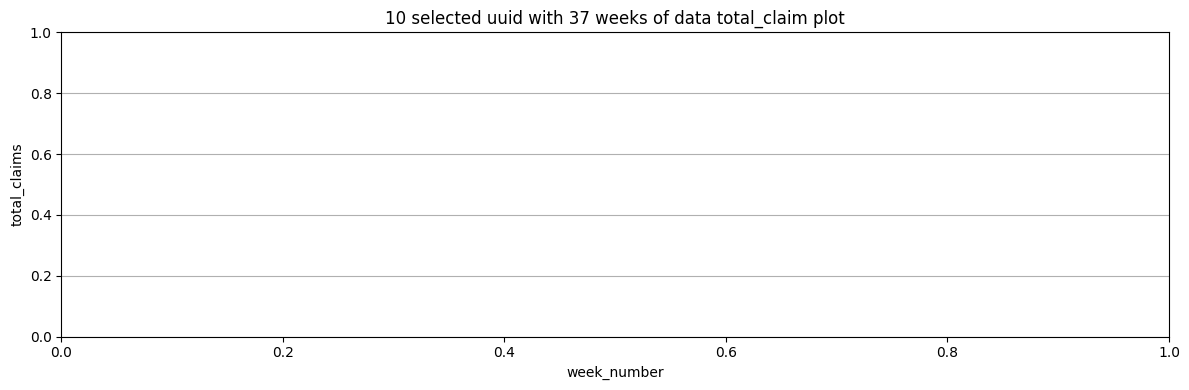

In [30]:
# plot the 10 uuid total_claim data from week 1 to week 37
plt.figure(figsize=(12,4))
plt.title("10 selected uuid with 37 weeks of data total_claim plot")
for i in range(len(ten_35w_data)):
    plt.plot(list(map(str, ten_35w_data[i]["week_number"])), 
             ten_35w_data[i]["total_claims"], 
             "o-", linewidth=1, markersize=5, alpha=0.7,
             label=ten_35w_data[i]["uu_id"][0])
    plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left', borderaxespad=0.)
plt.xlabel("week_number")
plt.ylabel("total_claims")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

In [31]:
# select 10 of 96 uuids with 3 weeks' data
QUERY = """
SELECT uu_id
FROM (
    SELECT uu_id, COUNT(DISTINCT(week_number)) as week_count
    FROM ironhacks-data.ironhacks_competition.unemployment_data
    GROUP BY uu_id
)
WHERE week_count <= 10
"""
query_job = bigquery_client.query(QUERY)
uuid_less_10w = query_job.to_dataframe()
uuid_less_10w.shape

NameError: name 'bigquery_client' is not defined

In [32]:
# select all POIs data with no more than 5 weeks of data
data_less_10w = []
for uuid in uuid_less_10w["uu_id"]:
    QUERY="""
    SELECT *
    FROM ironhacks-data.ironhacks_competition.unemployment_data
    WHERE uu_id="%s"
    ORDER BY week_number
    """%(uuid)
    query_job = bigquery_client.query(QUERY)
    data_less_10w.append(query_job.to_dataframe().drop_duplicates(ignore_index=True))

NameError: name 'uuid_less_10w' is not defined

In [33]:
# find out which weeks are available for these uuids
week_available = []
for i in range(len(data_less_10w)):
    week_available.append(list(data_less_10w[i]["week_number"]))

ValueError: colors and positions are unequal sized sequences

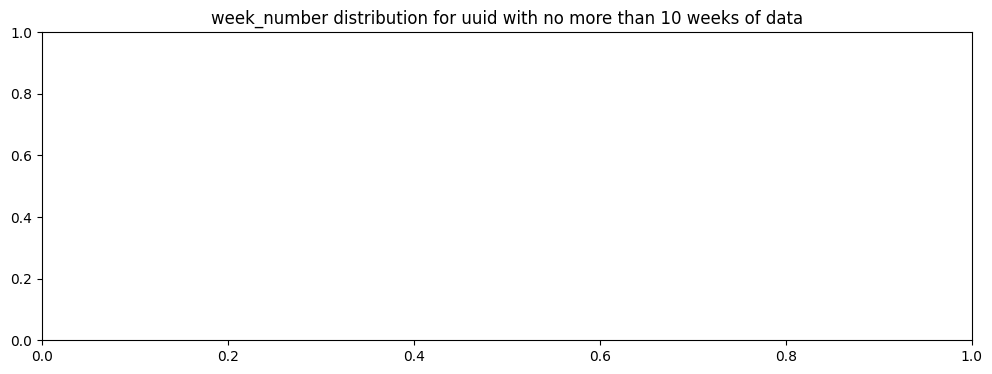

In [34]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(37)]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(37)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

In [35]:
week_available.shape

AttributeError: 'list' object has no attribute 'shape'

In [36]:
week_available.shape()

AttributeError: 'list' object has no attribute 'shape'

In [37]:
len(week_available)

0

In [38]:
week_available

[]

In [39]:
prediction_list.shape[0]

NameError: name 'prediction_list' is not defined

In [40]:
# save the query results to csv files
unemployement_data.to_csv("data/unemployment_data.csv")
print("unemployment_data shape:", unemployement_data.shape)

NameError: name 'unemployement_data' is not defined

In [41]:
wage_data.to_csv("data/wage_data.csv")
print("wage_data shape:", wage_data.shape)

NameError: name 'wage_data' is not defined

In [42]:
prediction_list.to_csv("data/prediction_list.csv")
print("prediction_list shape:", prediction_list.shape)
total_uuid = prediction_list.shape[0]

NameError: name 'prediction_list' is not defined

In [43]:
# query week_number data for uu_id f43fb9e90c5ecf879016b159aaa17fcb
query = """
SELECT uu_id, week_number
FROM ironhacks-data.ironhacks_competition.unemployment_data
WHERE uu_id="f43fb9e90c5ecf879016b159aaa17fcb"
ORDER BY week_number
"""
print(bigquery_client.query(query).to_dataframe().to_string(index=False))

NameError: name 'bigquery_client' is not defined

In [44]:
print(str(np.array(num_of_uuids)[-6:].sum()), "out of", total_uuid, "uuids have no less than 30 weeks of datapoints.")
print(str(np.array(num_of_uuids)[:9].sum()), "out of 573 uuids have no more than 10 weeks of datapoints.")

NameError: name 'num_of_uuids' is not defined

In [45]:
print(str(np.array(num_of_uuids)[-6:].sum()), "out of", total_uuid, "uuids have no less than 30 weeks of datapoints.")
print(str(np.array(num_of_uuids)[:9].sum()), "out of", total_uuid, "uuids have no more than 10 weeks of datapoints.")

NameError: name 'num_of_uuids' is not defined

NameError: name 'uuid_less_10w' is not defined

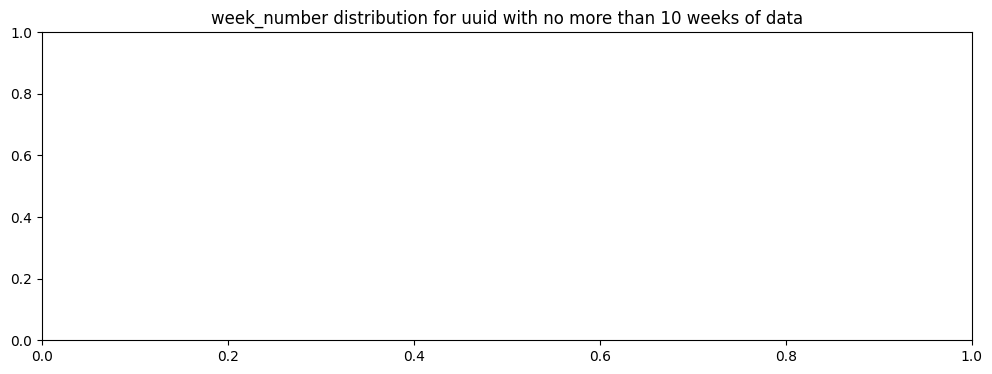

In [46]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(uuid_less_10w.shape[0])]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(37)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

NameError: name 'total_uuid_less_10w' is not defined

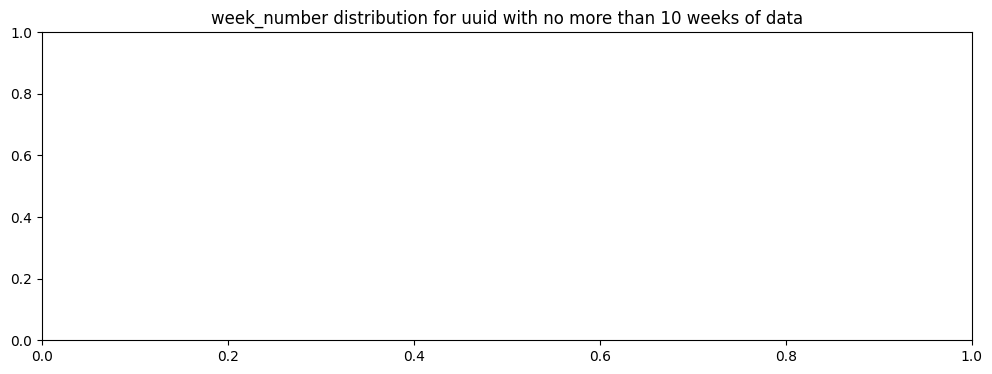

In [47]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(total_uuid_less_10w)]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(total_uuid_less_10w)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

In [48]:
# select 10 of 96 uuids with 3 weeks' data
QUERY = """
SELECT uu_id
FROM (
    SELECT uu_id, COUNT(DISTINCT(week_number)) as week_count
    FROM ironhacks-data.ironhacks_competition.unemployment_data
    GROUP BY uu_id
)
WHERE week_count <= 10
"""
query_job = bigquery_client.query(QUERY)
uuid_less_10w = query_job.to_dataframe()
uuid_less_10w.shape
total_uuid_less_10w = uuid_less_10w.shape

NameError: name 'bigquery_client' is not defined

In [49]:
# select all uuid data with no more than 10 weeks of data
data_less_10w = []
for uuid in uuid_less_10w["uu_id"]:
    QUERY="""
    SELECT *
    FROM ironhacks-data.ironhacks_competition.unemployment_data
    WHERE uu_id="%s"
    ORDER BY week_number
    """%(uuid)
    query_job = bigquery_client.query(QUERY)
    data_less_10w.append(query_job.to_dataframe().drop_duplicates(ignore_index=True))

NameError: name 'uuid_less_10w' is not defined

In [50]:
# find out which weeks are available for these uuids
week_available = []
for i in range(len(data_less_10w)):
    week_available.append(list(data_less_10w[i]["week_number"]))

NameError: name 'total_uuid_less_10w' is not defined

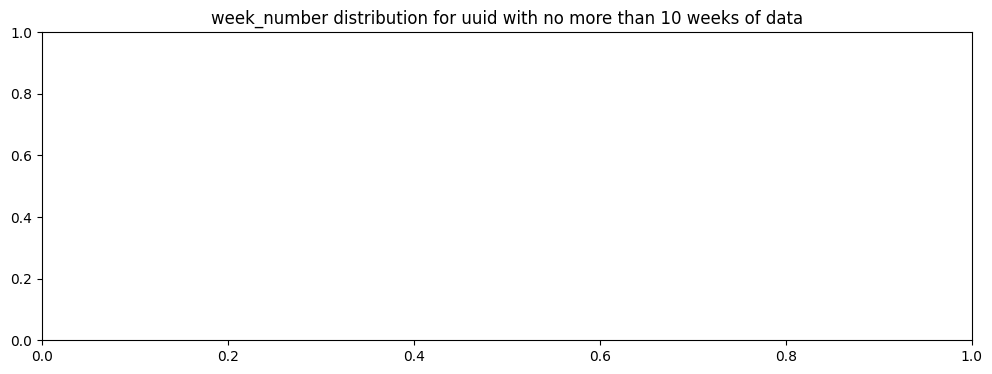

In [51]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(total_uuid_less_10w)]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(total_uuid_less_10w)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.tight_layout()
plt.show()

NameError: name 'total_uuid_less_10w' is not defined

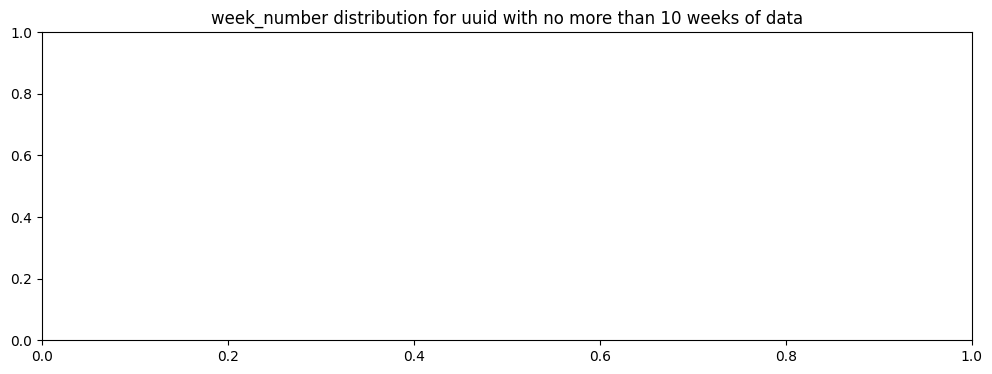

In [52]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(total_uuid_less_10w)]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(total_uuid_less_10w)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.axhline(4, color='black')
plt.axhline(23, color='black')
plt.tight_layout()
plt.show()

In [53]:
# select 10 of 96 uuids with 3 weeks' data
QUERY = """
SELECT uu_id
FROM (
    SELECT uu_id, COUNT(DISTINCT(week_number)) as week_count
    FROM ironhacks-data.ironhacks_competition.unemployment_data
    GROUP BY uu_id
)
WHERE week_count <= 10
"""
query_job = bigquery_client.query(QUERY)
uuid_less_10w = query_job.to_dataframe()
uuid_less_10w.shape
total_uuid_less_10w = uuid_less_10w.shape[0]

NameError: name 'bigquery_client' is not defined

NameError: name 'total_uuid_less_10w' is not defined

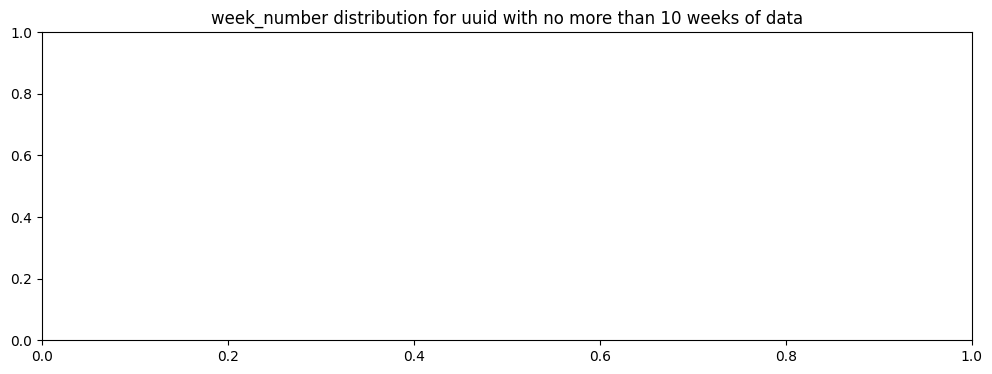

In [54]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(total_uuid_less_10w)]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(total_uuid_less_10w)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.axhline(4, color='black')
plt.axhline(23, color='black')
plt.tight_layout()
plt.show()

NameError: name 'total_uuid_less_10w' is not defined

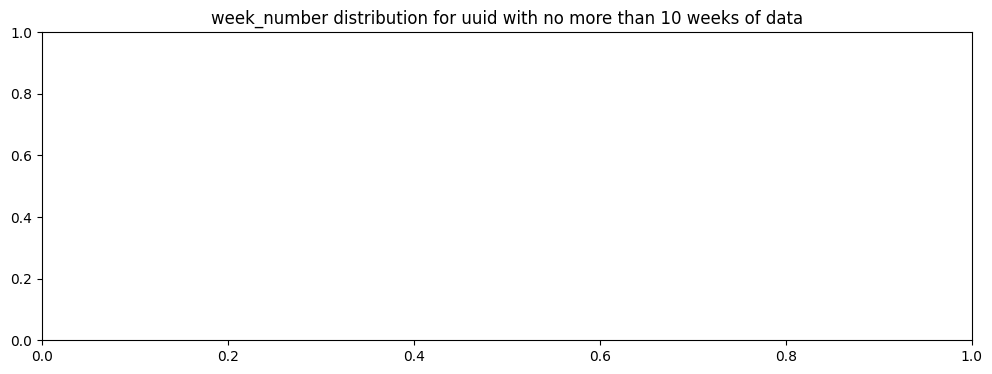

In [55]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(total_uuid_less_10w)]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(total_uuid_less_10w)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.axhline(4, color='grey')
plt.axhline(23, color='grey')
plt.tight_layout()
plt.show()

NameError: name 'total_uuid_less_10w' is not defined

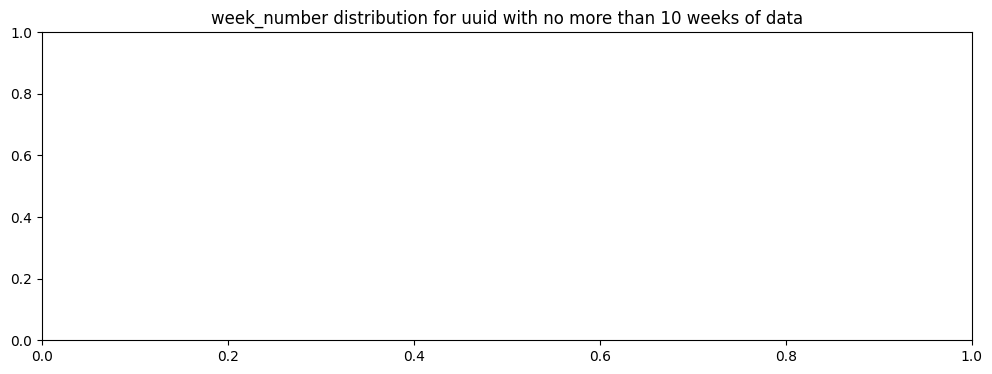

In [56]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(total_uuid_less_10w)]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(total_uuid_less_10w)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.axhline(4)
plt.axhline(23)
plt.tight_layout()
plt.show()

NameError: name 'total_uuid_less_10w' is not defined

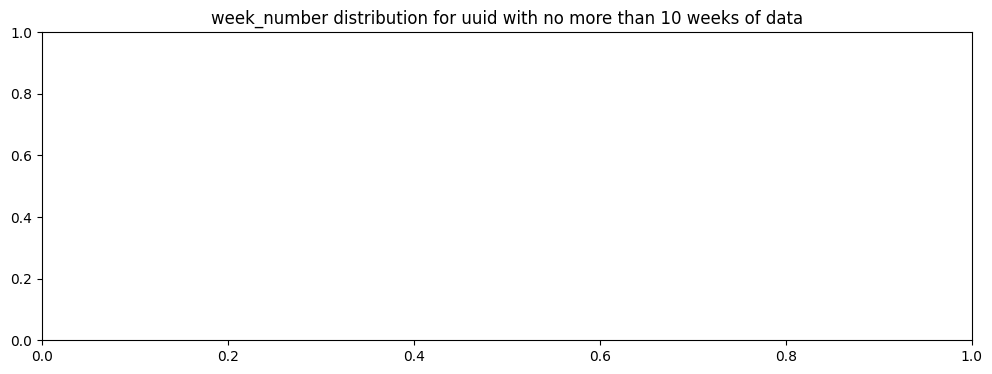

In [57]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(total_uuid_less_10w)]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(total_uuid_less_10w)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.axhline(4, alpha=0.5)
plt.axhline(23)
plt.tight_layout()
plt.show()

NameError: name 'total_uuid_less_10w' is not defined

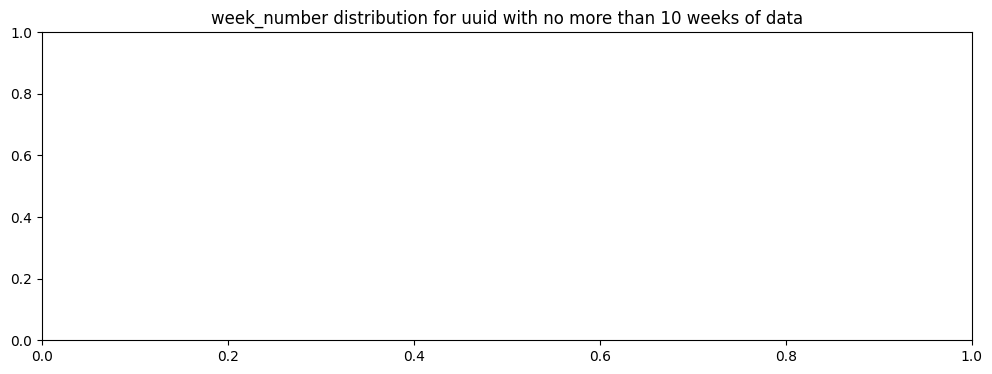

In [58]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(total_uuid_less_10w)]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(total_uuid_less_10w)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.axhline(4, alpha=0.5)
plt.axhline(23,  alpha=0.5)
plt.tight_layout()
plt.show()

NameError: name 'total_uuid_less_10w' is not defined

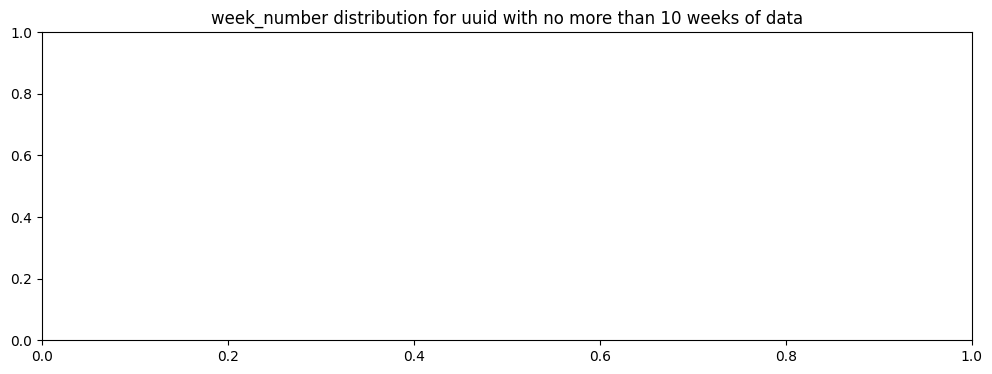

In [59]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(total_uuid_less_10w)]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(total_uuid_less_10w)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.axhline(4, alpha=0.5)
plt.axhline(23, alpha=0.5)
plt.tight_layout()
plt.show()

In [60]:
# save query result into csv file
raw_total_claims_df = pd.DataFrame.from_dict(raw_total_claims_data)
raw_total_claims_df.to_csv("raw_total_claims.csv", index=False)

NameError: name 'raw_total_claims_data' is not defined

In [61]:
# query all total_claims data and store in raw_total_claims_data dict
def query_all_total_claims():
    temp_query_list = prediction_list["uu_id"] # the list of uuids to be queried
    raw_total_claims_data = {uuid:[] for uuid in temp_query_list} # dict to store all query results
    total_week = 37

    progress = 0
    total = len(temp_query_list)
    for uuid in temp_query_list:
        progress = progress + 1
        print('\r', "Querying", str(progress) + "/" + str(total), "uuid's data...", end='\r')
        QUERY="""
        SELECT week_number, total_claims
        FROM ironhacks-data.ironhacks_competition.unemployment_data
        WHERE uu_id="%s"
        ORDER BY week_number
        """%(uuid)
        query_job = bigquery_client.query(QUERY)
        res = query_job.to_dataframe().drop_duplicates(ignore_index=True).to_numpy()

        # Fill the missing total_claims between week 1 and week 37 with value 0
        index = 0
        for w in range(1,total_week + 1):
            if index == len(res):
                raw_total_claims_data[uuid].append({w:0})
                continue
            if w == res[index][0]:
                raw_total_claims_data[uuid].append({w:res[index][1]})
                index = index + 1
            else:
                raw_total_claims_data[uuid].append({w:0})
        return raw_total_claims_data

In [62]:
# commented for only excuting once
raw_total_claims_data = query_all_total_claims()

NameError: name 'prediction_list' is not defined

In [63]:
# save query result into csv file
raw_total_claims_df = pd.DataFrame.from_dict(raw_total_claims_data)
raw_total_claims_df.to_csv("raw_total_claims.csv", index=False)

NameError: name 'raw_total_claims_data' is not defined

In [64]:
# query all total_claims data and store in raw_total_claims_data dict
def query_all_total_claims():
    temp_query_list = prediction_list["uu_id"] # the list of uuids to be queried
    raw_total_claims_data = {uuid:[] for uuid in temp_query_list} # dict to store all query results
    total_week = 37

    progress = 0
    total = len(temp_query_list)
    for uuid in temp_query_list:
        progress = progress + 1
        print('\r', "Querying", str(progress) + "/" + str(total), "uuid's data...", end='\r')
        QUERY="""
        SELECT week_number, total_claims
        FROM ironhacks-data.ironhacks_competition.unemployment_data
        WHERE uu_id="%s"
        ORDER BY week_number
        """%(uuid)
        query_job = bigquery_client.query(QUERY)
        res = query_job.to_dataframe().drop_duplicates(ignore_index=True).to_numpy()

        # Fill the missing total_claims between week 1 and week 37 with value 0
        index = 0
        for w in range(1,total_week + 1):
            if index == len(res):
                raw_total_claims_data[uuid].append({w:0})
                continue
            if w == res[index][0]:
                raw_total_claims_data[uuid].append({w:res[index][1]})
                index = index + 1
            else:
                raw_total_claims_data[uuid].append({w:0})
        return raw_total_claims_data

In [65]:
# commented for only excuting once
raw_total_claims_data = query_all_total_claims()

NameError: name 'prediction_list' is not defined

In [66]:
# query all total_claims data and store in raw_total_claims_data dict
def query_all_total_claims():
    temp_query_list = prediction_list["uu_id"] # the list of uuids to be queried
    raw_total_claims_data = {uuid:[] for uuid in temp_query_list} # dict to store all query results
    total_week = 37

    progress = 0
    total = len(temp_query_list)
    for uuid in temp_query_list:
        progress = progress + 1
        print('\r', "Querying", str(progress) + "/" + str(total), "uuid's data...", end='\r')
        QUERY="""
        SELECT week_number, total_claims
        FROM ironhacks-data.ironhacks_competition.unemployment_data
        WHERE uu_id="%s"
        ORDER BY week_number
        """%(uuid)
        query_job = bigquery_client.query(QUERY)
        res = query_job.to_dataframe().drop_duplicates(ignore_index=True).to_numpy()

        # Fill the missing total_claims between week 1 and week 37 with value 0
        index = 0
        for w in range(1,total_week + 1):
            if index == len(res):
                raw_total_claims_data[uuid].append({w:0})
                continue
            if w == res[index][0]:
                raw_total_claims_data[uuid].append({w:res[index][1]})
                index = index + 1
            else:
                raw_total_claims_data[uuid].append({w:0})
    return raw_total_claims_data

In [67]:
# commented for only excuting once
raw_total_claims_data = query_all_total_claims()

NameError: name 'prediction_list' is not defined

In [68]:
# save query result into csv file
raw_total_claims_df = pd.DataFrame.from_dict(raw_total_claims_data)
raw_total_claims_df.to_csv("raw_total_claims.csv", index=False)

NameError: name 'raw_total_claims_data' is not defined

In [69]:
raw_total_claims_df = pd.read_csv("raw_total_claims.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'raw_total_claims.csv'

In [70]:
for i in range(0, 37):
    for j in range(0, 573):
        d = raw_total_claims_df.iloc[i,j]
        # print(int(d.split(":")[1].split("}")[0]))
        raw_total_claims_df.iloc[i,j] = int(d.split(":")[1].split("}")[0])

NameError: name 'raw_total_claims_df' is not defined

In [71]:
raw_total_claims_list = raw_total_claims_df.T.to_numpy()
raw_total_claims_list = raw_total_claims_list[:]

NameError: name 'raw_total_claims_df' is not defined

In [72]:
x_labels = [w for w in range(1, 38)]
NUM_PLOTS = len(raw_total_claims_list)

NameError: name 'raw_total_claims_list' is not defined

NameError: name 'NUM_PLOTS' is not defined

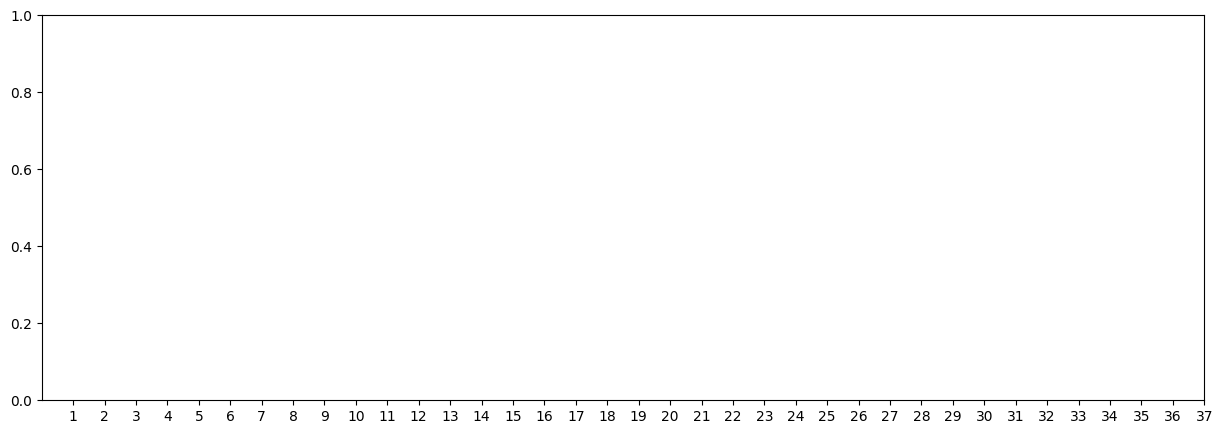

In [73]:
plt.figure(figsize=(15,5))
plt.xticks(x_labels)
for i in range(0, NUM_PLOTS):
    plt.plot(x_labels, raw_total_claims_list[i], ".-")

In [74]:
raw_total_claims_df = pd.read_csv("raw_total_claims.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'raw_total_claims.csv'

In [75]:
for i in range(0, 37):
    for j in range(0, total_uuid):
        d = raw_total_claims_df.iloc[i,j]
        # print(int(d.split(":")[1].split("}")[0]))
        raw_total_claims_df.iloc[i,j] = int(d.split(":")[1].split("}")[0])

NameError: name 'total_uuid' is not defined

In [76]:
raw_total_claims_list = raw_total_claims_df.T.to_numpy()
raw_total_claims_list = raw_total_claims_list[:]

NameError: name 'raw_total_claims_df' is not defined

In [77]:
x_labels = [w for w in range(1, 38)]
NUM_PLOTS = len(raw_total_claims_list)

NameError: name 'raw_total_claims_list' is not defined

NameError: name 'NUM_PLOTS' is not defined

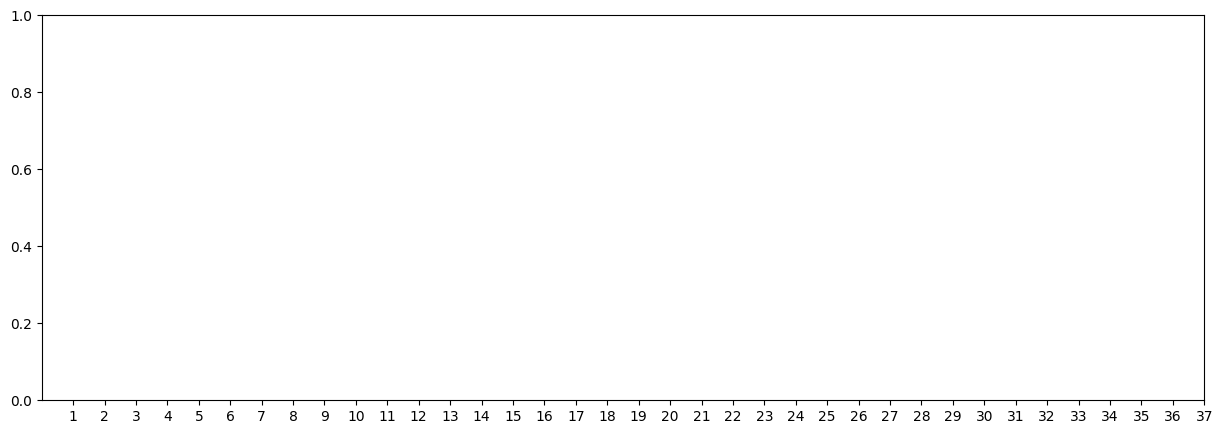

In [78]:
plt.figure(figsize=(15,5))
plt.xticks(x_labels)
for i in range(0, NUM_PLOTS):
    plt.plot(x_labels, raw_total_claims_list[i], ".-")

In [79]:
# fill week 4 and week 23 data with mean values for all uuids
for row in raw_total_claims_list:
    temp_sum = 0
    w4_val = round(0.5 * (row[2] + row[4]) + 0.01)
    w23_val = round(0.5 * (row[21] + row[23]) + 0.01)
    row[3] = w4_val
    row[22] = w23_val

NameError: name 'raw_total_claims_list' is not defined

NameError: name 'NUM_PLOTS' is not defined

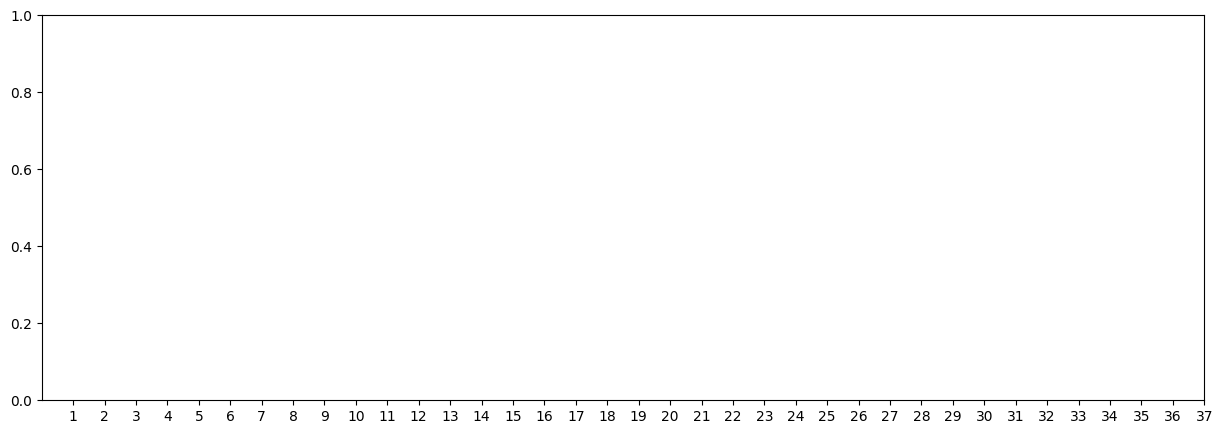

In [80]:
plt.figure(figsize=(15,5))
plt.xticks(x_labels)
for i in range(0, NUM_PLOTS):
    plt.plot(x_labels, raw_total_claims_list[i])

In [81]:
def mse_loss(y_true, y_pred):
    """
    MSE loss function
    Inputs param
    -------------------------
    y_true: list
    The ground truth values
    y_pred: list
    The predicted values
    -------------------------
    return: number
    mean square error of the two input lists
    """
    if(len(y_true) != len(y_pred)):
        print("True label len:" + str(len(y_true)) + ", Predict label len: " + str(len(y_pred)))
        raise Exception("Input lists have different length")
    mse = np.mean(np.array(y_true) - np.array(y_pred))**2
    return mse

In [82]:
def mae_loss(y_true, y_pred):
    """
    MAE loss function
    Inputs param
    -------------------------
    y_true: list
    The ground truth values
    y_pred: list
    The predicted values
    -------------------------
    return: number
    mean absolute error of the two input lists
    """
    if(len(y_true) != len(y_pred)):
        print("True label len:" + str(len(y_true)) + ", Predict label len: " + str(len(y_pred)))
        raise Exception("Input lists have different length")
    mae = np.mean(np.absolute(np.array(y_true) - np.array(y_pred)))
    return mae

In [83]:
uuid_list = list(raw_total_claims_df.columns)
pred_results = [round(np.array(row).mean() + 0.01) for row in raw_total_claims_list]

NameError: name 'raw_total_claims_df' is not defined

In [84]:
# Mean value as the prediction result
result_dict = {
    'uu_id':uuid_list, 
    'total_claims': pred_results,
    'week_number': [39 for i in range(573)]
}
result_to_csv = pd.DataFrame(result_dict)
result_to_csv

NameError: name 'uuid_list' is not defined

In [85]:
print(uuid_list[0])
print(list(raw_total_claims_list[0]))

NameError: name 'uuid_list' is not defined

In [86]:
def mse_loss(y_true, y_pred):
    """
    MSE loss function
    Inputs param
    -------------------------
    y_true: list
    The ground truth values
    y_pred: list
    The predicted values
    -------------------------
    return: number
    mean square error of the two input lists
    """
    if(len(y_true) != len(y_pred)):
        print("True label len:" + str(len(y_true)) + ", Predict label len: " + str(len(y_pred)))
        raise Exception("Input lists have different length")
    mse = np.mean(np.array(y_true) - np.array(y_pred))**2
    return mse

In [87]:
def mae_loss(y_true, y_pred):
    """
    MAE loss function
    Inputs param
    -------------------------
    y_true: list
    The ground truth values
    y_pred: list
    The predicted values
    -------------------------
    return: number
    mean absolute error of the two input lists
    """
    if(len(y_true) != len(y_pred)):
        print("True label len:" + str(len(y_true)) + ", Predict label len: " + str(len(y_pred)))
        raise Exception("Input lists have different length")
    mae = np.mean(np.absolute(np.array(y_true) - np.array(y_pred)))
    return mae

In [88]:
uuid_list = list(raw_total_claims_df.columns)
pred_results = [round(np.array(row).mean() + 0.01) for row in raw_total_claims_list]

NameError: name 'raw_total_claims_df' is not defined

In [89]:
# Mean value as the prediction result
result_dict = {
    'uu_id':uuid_list, 
    'total_claims': pred_results,
    'week_number': [39 for i in range(total_uuid)]
}
result_to_csv = pd.DataFrame(result_dict)
result_to_csv

NameError: name 'uuid_list' is not defined

In [90]:
print(uuid_list[0])
print(list(raw_total_claims_list[0]))

NameError: name 'uuid_list' is not defined

In [91]:
print(list(raw_total_claims_df["26c71b31d464bc7bedc8aed7e5c6e641"]))

NameError: name 'raw_total_claims_df' is not defined

In [92]:
result_to_csv.to_csv("submission_prediction_output.csv", index=False)

NameError: name 'result_to_csv' is not defined

In [93]:
temp_res = [row[-1] for row in raw_total_claims_list]

NameError: name 'raw_total_claims_list' is not defined

In [94]:
print(list(raw_total_claims_df["8ba19786b86ae124a9d7eaa054f15d23"]))

NameError: name 'raw_total_claims_df' is not defined

In [95]:
result_to_csv.to_csv("submission_prediction_output.csv", index=False)

NameError: name 'result_to_csv' is not defined

In [96]:
temp_res = [row[-1] for row in raw_total_claims_list]

NameError: name 'raw_total_claims_list' is not defined

In [97]:
mae_loss(temp_res, pred_results)

NameError: name 'temp_res' is not defined

NameError: name 'total_uuid_less_10w' is not defined

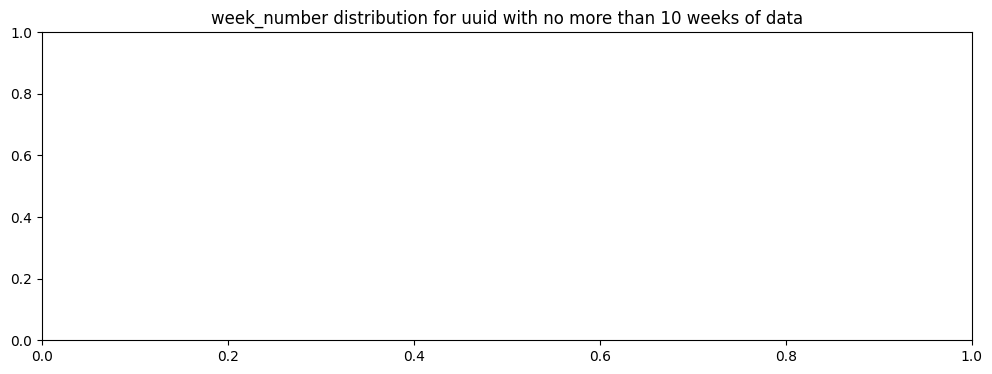

In [98]:
# plot the avaliable weeks vs uu_id
plt.figure(figsize=(12,4))
plt.title("week_number distribution for uuid with no more than 10 weeks of data")
colors = ['C{}'.format(i) for i in range(total_uuid_less_10w)]
plt.eventplot(week_available, orientation='vertical', linelengths=0.2, linewidths=4, colors=colors)
plt.yticks([i for i in range(1,38,2)])
plt.ylabel("week_number")
plt.xticks([i for i in range(total_uuid_less_10w)])
plt.xlabel("uu_id")
plt.grid(axis="x")
plt.axhline(4, alpha=0.5)
plt.axhline(23, alpha=0.5)
plt.axhline(37, alpha=0.5)
plt.tight_layout()
plt.show()